In [1]:
%matplotlib inline

In [2]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete = load_umachine_sdss_with_meert15()
no_data_mask = np.isnan(full_sdss['Magr_tot_meert15'])

mask = ~no_data_mask & behroozi_complete
sdss = full_sdss[mask]

from galsize_models.models.kravtsov13 import halo_radius_vs_stellar_mass
sdss['rvir_halo_kpc'] = halo_radius_vs_stellar_mass(10**sdss['sm'])

from galsize_models.models.load_baseline_catalogs import load_umachine_mock
mock = load_umachine_mock()

mask_sf = sdss['ssfr'] >= -10.75
mask_gv = (sdss['ssfr'] < -10.75) & (sdss['ssfr'] >= -11.25)
mask_q = (sdss['ssfr'] < -11.25)

mock_mask_sf = mock['ssfr'] >= -10.75
mock_mask_gv = (mock['ssfr'] < -10.75) & (mock['ssfr'] >= -11.25)
mock_mask_q = (mock['ssfr'] < -11.25)

Total runtime = 0.70 seconds


In [74]:
from galsize_models.models import component_size_vs_rhalo, galaxy_size_vs_rhalo
scatter = 0.3
norm_bulge, norm_disk = 0.015, 0.1
alpha_bulge, alpha_disk = 1, 0.6

mock['r50_magr_kpc_meert15'] = galaxy_size_vs_rhalo(mock['rvir_halo_kpc'], mock['bt_meert15_random'], 
                                   norm_bulge, norm_disk, alpha_bulge, alpha_disk, 
                                   scatter=scatter)

scatter_alt = 0.25
norm_bulge_alt, norm_disk_alt = 0.015, 0.09
alpha_bulge_alt, alpha_disk_alt = 1, 0.6

mock['r50_magr_kpc_meert15_alt'] = galaxy_size_vs_rhalo(mock['rvir_halo_kpc'], mock['bt_meert15_random'], 
                                   norm_bulge_alt, norm_disk_alt, alpha_bulge, alpha_disk_alt, 
                                   scatter=scatter_alt)

from galsize_models.measurements import rvir_rhalf_power_law_fit

log10_rhalo_max=np.log10(2000.)

c1_all, c0_all = rvir_rhalf_power_law_fit(mock['r50_magr_kpc_meert15'], mock['rvir_halo_kpc'], 
                                         log10_rhalo_max=log10_rhalo_max)
c1_sf, c0_sf = rvir_rhalf_power_law_fit(mock['r50_magr_kpc_meert15'][mock_mask_sf], 
                                        mock['rvir_halo_kpc'][mock_mask_sf], log10_rhalo_max=log10_rhalo_max)
c1_q, c0_q = rvir_rhalf_power_law_fit(mock['r50_magr_kpc_meert15'][mock_mask_q], 
                                        mock['rvir_halo_kpc'][mock_mask_q], log10_rhalo_max=log10_rhalo_max)
c1_gv, c0_gv = rvir_rhalf_power_law_fit(mock['r50_magr_kpc_meert15'][mock_mask_gv], 
                                        mock['rvir_halo_kpc'][mock_mask_gv], log10_rhalo_max=log10_rhalo_max)

c1_all_alt, c0_all_alt = rvir_rhalf_power_law_fit(mock['r50_magr_kpc_meert15_alt'], mock['rvir_halo_kpc'], 
                                         log10_rhalo_max=log10_rhalo_max)
c1_sf_alt, c0_sf_alt = rvir_rhalf_power_law_fit(mock['r50_magr_kpc_meert15_alt'][mock_mask_sf], 
                                        mock['rvir_halo_kpc'][mock_mask_sf], log10_rhalo_max=log10_rhalo_max)
c1_q_alt, c0_q_alt = rvir_rhalf_power_law_fit(mock['r50_magr_kpc_meert15_alt'][mock_mask_q], 
                                        mock['rvir_halo_kpc'][mock_mask_q], log10_rhalo_max=log10_rhalo_max)
c1_gv_alt, c0_gv_alt = rvir_rhalf_power_law_fit(mock['r50_magr_kpc_meert15_alt'][mock_mask_gv], 
                                        mock['rvir_halo_kpc'][mock_mask_gv], log10_rhalo_max=log10_rhalo_max)


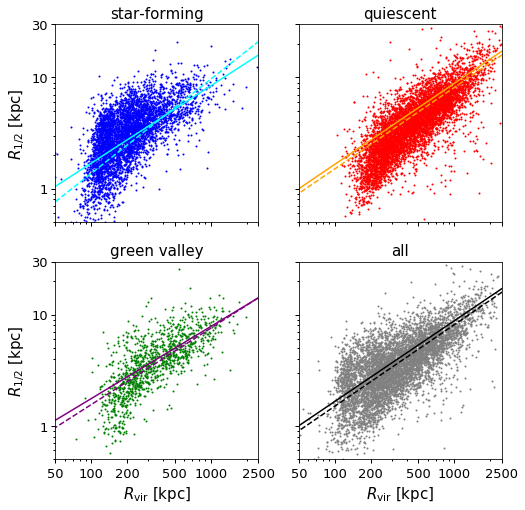

In [75]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))

axes = (ax1, ax2, ax3, ax4)
for ax in axes:
    __=ax.loglog()

nskip = 20
__=ax1.scatter(sdss['rvir_halo_kpc'][mask_sf][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_sf][::nskip], 
              color='blue', s=1, label='')
__=ax2.scatter(sdss['rvir_halo_kpc'][mask_q][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_q][::nskip], 
              color='red', s=1, label='')
__=ax3.scatter(sdss['rvir_halo_kpc'][mask_gv][::nskip], 
              sdss['r50_magr_kpc_meert15'][mask_gv][::nskip], 
              color='green', s=1, label='')
__=ax4.scatter(sdss['rvir_halo_kpc'][::2*nskip], 
              sdss['r50_magr_kpc_meert15'][::2*nskip], 
              color='gray', s=1, label='')

rhalo_abscissa = np.linspace(10, 25000, 200)
__=ax1.plot(rhalo_abscissa, c0_sf*rhalo_abscissa**c1_sf, color='cyan')
__=ax2.plot(rhalo_abscissa, c0_q*rhalo_abscissa**c1_q, color='orange')
__=ax3.plot(rhalo_abscissa, c0_gv*rhalo_abscissa**c1_gv, color='purple')
__=ax4.plot(rhalo_abscissa, c0_all*rhalo_abscissa**c1_all, color='k')

# __=ax1.plot(rhalo_abscissa, c0_sf_alt*rhalo_abscissa**c1_sf_alt, '--', color='cyan')
# __=ax2.plot(rhalo_abscissa, c0_q_alt*rhalo_abscissa**c1_q_alt, '--', color='orange')
# __=ax3.plot(rhalo_abscissa, c0_gv_alt*rhalo_abscissa**c1_gv_alt, '--', color='purple')
# __=ax4.plot(rhalo_abscissa, c0_all_alt*rhalo_abscissa**c1_all_alt, '--', color='k')


xlabel, ylabel = r'$R_{\rm vir}$ [kpc]', r'$R_{1/2}$ [kpc]'
xlabel3 = ax3.set_xlabel(xlabel); xlabel4 = ax4.set_xlabel(xlabel)
ylabel1 = ax1.set_ylabel(ylabel); ylabel3 = ax3.set_ylabel(ylabel)
title1 = ax1.set_title('star-forming'); title2 = ax2.set_title('quiescent')
title3 = ax3.set_title('green valley'); title4 = ax4.set_title('all')

from matplotlib import ticker
xticks,  yticks = (50, 100, 200, 500, 1000, 2500), (1, 10, 30)
xmin, xmax = 50, 2500; ymin, ymax = 0.5, 30
for ax in axes:
    __=ax.set_xticks(xticks)
    __=ax.set_yticks(yticks)
    __=ax.set_xlim(xmin, xmax)
    __=ax.set_ylim(ymin, ymax)
    __=ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())
    __=ax.get_xaxis().set_minor_formatter(ticker.NullFormatter())
    __=ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    __=ax.get_yaxis().set_minor_formatter(ticker.NullFormatter())

figname = 'galsize_vs_rhalo_power_law_fits.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel1], bbox_inches='tight')


In [76]:

print("Power law coefficients:\n")
print("               c0    c1")
print("              ----  ----")
print("Star-forming: {0:.2f}, {1:.2f}".format(c0_sf, c1_sf))
print("Green valley: {0:.2f}, {1:.2f}".format(c0_gv, c1_gv))
print("Quiescent:    {0:.2f}, {1:.2f}".format(c0_q, c1_q))
print("All galaxies: {0:.2f}, {1:.2f}".format(c0_all, c1_all))


Power law coefficients:

               c0    c1
              ----  ----
Star-forming: 0.07, 0.70
Green valley: 0.09, 0.65
Quiescent:    0.06, 0.73
All galaxies: 0.06, 0.73


## Now plot clustering

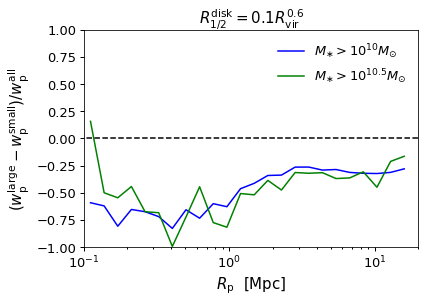

In [82]:
from galsize_models.measurements import wp_ssfr_sequence_mock

rp_mids, wp_10p0_sf, wp_10p0_sf_small, wp_10p0_sf_large = wp_ssfr_sequence_mock(mock, 10, 'sf')
fracdiff_10p0_sf = (wp_10p0_sf_large-wp_10p0_sf_small)/wp_10p0_sf
rp_mids, wp_10p0_sf_alt, wp_10p0_sf_small_alt, wp_10p0_sf_large_alt = wp_ssfr_sequence_mock(mock, 10, 'sf', size_key='r50_magr_kpc_meert15_alt')
fracdiff_10p0_sf_alt = (wp_10p0_sf_large_alt-wp_10p0_sf_small_alt)/wp_10p0_sf_alt

rp_mids, wp_10p5_sf, wp_10p5_sf_small, wp_10p5_sf_large = wp_ssfr_sequence_mock(mock, 10.5, 'sf')
fracdiff_10p5_sf = (wp_10p5_sf_large-wp_10p5_sf_small)/wp_10p5_sf
rp_mids, wp_10p5_sf_alt, wp_10p5_sf_small_alt, wp_10p5_sf_large_alt = wp_ssfr_sequence_mock(mock, 10.5, 'sf', size_key='r50_magr_kpc_meert15_alt')
fracdiff_10p5_sf_alt = (wp_10p5_sf_large_alt-wp_10p5_sf_small_alt)/wp_10p5_sf_alt

fig, ax = plt.subplots(1, 1)

xscale = ax.set_xscale('log')

__=ax.plot(rp_mids, fracdiff_10p0_sf, color='blue', label=r'$M_{\ast}>10^{10}M_{\odot}$')
__=ax.plot(rp_mids, fracdiff_10p5_sf, color='green', label=r'$M_{\ast}>10^{10.5}M_{\odot}$')
# __=ax.plot(rp_mids, fracdiff_10p0_sf_alt, '--', color='blue')
__=ax.plot(np.logspace(-2, 2, 100), np.zeros(100), '--', color='k')

xlim = ax.set_xlim(0.1, 20)
ylim = ax.set_ylim(-1, 1)

xlabel = ax.set_xlabel(r'$R_{\rm p}$  $[{\rm Mpc}]$')
ylabel = ax.set_ylabel(r'$(w_{\rm p}^{\rm large}-w_{\rm p}^{\rm small})/w_{\rm p}^{\rm all}$')
title = ax.set_title(r'$R_{1/2}^{\rm disk} = 0.1R_{\rm vir}^{0.6}$')
legend = ax.legend()

figname = 'main_sequence_wp_ratio_power_law_fits.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel1], bbox_inches='tight')
